# 最小二乘法

### 使用目标函数y=sin2πx，加上一个正态分布的噪声干扰，用多项式去拟合

In [7]:
import numpy as np
import pandas as pd 
import scipy as sp
from scipy.optimize import leastsq #最小二乘最小化
import matplotlib.pyplot as plt
%matplotlib inline

#### np.polyld(1,2,3)代表1*x**2+2*x+3 ，代表系数向量

In [2]:
#目标函数
def real_func(x):
    return np.sin(2*np.pi*x)
#多项式函数
def fit_func(p,x):
    f=np.poly1d(p)
    return f(x)    #要计算多项式的值，把x代入其中计算
#残差
def residuals_func(p,x,y):
    ret=fit_func(p,x)-y
    return ret

#### 使用scipy.optimize包里面的leastsq函数来进行最小二乘法。 leastsq(func, x0, args=()) ,func 是我们自己定义的一个计算误差的函数，x0表示计算的初始参数值，args 是指定func的其他参数

In [8]:
#十个点
x=np.linspace(0,1,10)   #从0开始，1结束，等间距选取10个点
x_points=np.linspace(0,1,1000)
#加上 正态分布噪声的目标函数的值
y_=real_func(x)
y=[np.random.normal(0,0.1)+y1 for y1 in y_]  #从均值为1，标准差差为0.1的正态分布中随机选取样本

def fitting(M):
    '''M为多项式次数'''
    #随机初始化多项式参数
    p_init=np.random.rand(M+1)
    #最小二乘法
    p_lsq=leastsq(residuals_func,p_init,args=(x,y))#args可以接受任意多的参数，并将其打包为一个元组传入函数内部进行计算
    print('Fitting Parameters:',p_lsq[0]) #打印拟合参数
    
    #可视化
    plt.plot(x_points,real_func(x_points),label='real')
    plt.plot(x_points,fit_func(p_lsq[0],x_points),label='fitted')
    plt.plot(x,y,'bo',label='noise')
    plt.legend()   #在plt.plot() 定义后plt.legend()会显示该 label 的内容
    return p_lsq

Fitting Parameters: [-0.08220205]


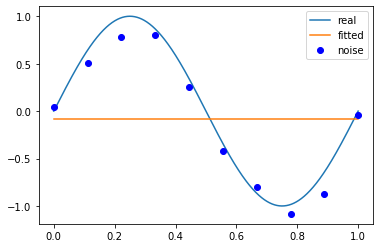

In [9]:
p_lsq_0=fitting(M=0)

Fitting Parameters: [-1.37439493  0.60499541]


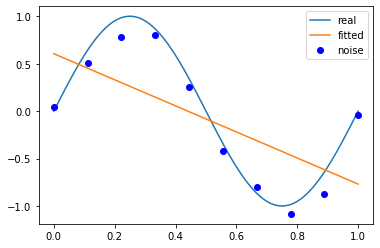

In [10]:
p_lsq_1=fitting(M=1)

Fitting Parameters: [ 19.69091356 -29.45824056   9.75427919  -0.06410336]


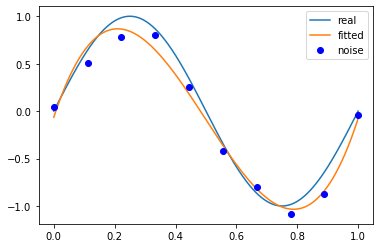

In [12]:
p_lsq_3=fitting(M=3)

Fitting Parameters: [-5.90640801e+03  2.35566550e+04 -3.79057779e+04  3.12882484e+04
 -1.38362256e+04  3.07470408e+03 -2.64791762e+02 -1.27301125e+01
  6.24397714e+00  4.47556312e-02]


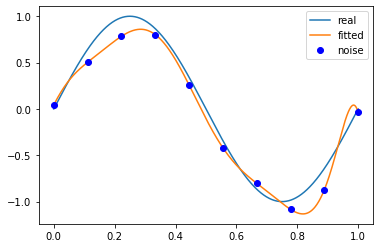

In [13]:
p_lsq_9=fitting(M=9)

#### M=9时，多项式曲线经过每一个数据点，造成过拟合 

# 正则化

### 结果显示过拟合， 引入正则化项(regularizer)，降低过拟合 

####  回归问题中，损失函数是平方损失，正则化可以是参数向量的L2范数,也可以是L1范数。

L1: regularization*abs(p)

L2: 0.5 * regularization * np.square(p)

In [14]:
regularization=0.0001

def residuals_func_refularization(p,x,y):
    ret=fit_func(p,x)-y
    ret=np.append(ret,np.sqrt(0.5*regularization*np.square(p)))
    return ret

In [15]:
#最小二乘法，加正则化项
p_init=np.random.rand(9+1)
p_lsp_regularization=leastsq(residuals_func_refularization,p_init,args=(x,y))

Fitting Parameters: [ -2.72979576  -1.77896766   1.02418597   4.66864009   6.73762714
   3.55784191  -6.40308068 -11.37588127   6.23364998   0.02415122]


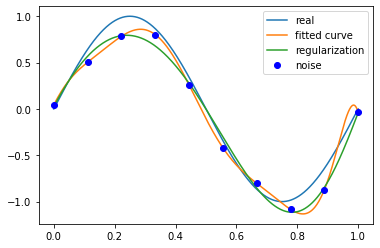

In [18]:
plt.plot(x_points,real_func(x_points),label='real')
plt.plot(x_points,fit_func(p_lsq_9[0],x_points),label='fitted curve')
plt.plot(x_points,fit_func(p_lsp_regularization[0],x_points),label='regularization')
plt.plot(x,y,'bo',label='noise')
plt.legend()
print('Fitting Parameters:',p_lsp_regularization[0])